In [1]:
import torch
from torch import nn, optim

import matplotlib.pyplot as plt

### Input side

- Input feature matrix: 

$$X_{feature} = \begin{bmatrix}
x_{11} & x_{12} & \cdots &x_{1D}\\
x_{21} & x_{22} & \cdots &x_{2D}\\
\vdots & \vdots & \ddots &\vdots\\
x_{K1} & x_{K2} & \cdots &x_{KD}
\end{bmatrix}_{K\times D}$$

- Input weight matrix:
$$W_{in} = \begin{bmatrix}
w_{11} & w_{12} & \cdots & w_{1D}\\
w_{21} & w_{22} & \cdots & w_{2D}\\
\vdots & \vdots & \ddots & \vdots\\
w_{H1} & w_{H2} & \cdots & w_{HD}
\end{bmatrix}_{H\times D}$$

- Input bias matrix:\
$$B_{in} = \begin{bmatrix}
b_1 &\cdots & b_{H}\\
\vdots & \ddots & \vdots\\
b_1 &\cdots & b_{H}
\end{bmatrix}_{K\times H}$$

where $H$ is a number of Hidden units and  $K$ is a number of samples and $D$ is a number of features.

### Output side

- Hidden feature matrix: 

$$X_{hidden} = \begin{bmatrix}
x_{11} & x_{12} & \cdots &x_{1D}\\
x_{21} & x_{22} & \cdots &x_{2D}\\
\vdots & \vdots & \ddots &\vdots\\
x_{K1} & x_{K2} & \cdots &x_{KH}
\end{bmatrix}_{K\times H}$$

- Outout weight matrix:
$$W_{in} = \begin{bmatrix}
w_{11} & w_{12} & \cdots & w_{1H}\\
w_{21} & w_{22} & \cdots & w_{2H}\\
\vdots & \vdots & \ddots & \vdots\\
w_{N1} & w_{N2} & \cdots & w_{NH}
\end{bmatrix}_{N\times H}$$

- Output bias matrix:\
$$B_{in} = \begin{bmatrix}
b_1 &\cdots & b_{N}\\
\vdots & \ddots & \vdots\\
b_1 &\cdots & b_{N}
\end{bmatrix}_{K\times N}$$

where $N$ is a number of output class.


![](SingleLayer.png)

In [2]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

In [3]:
model = Net(1, 2, 1)

In [4]:
X = torch.tensor([[0.0], [1.0], [2.0]])
Yhat = model(X)

In [5]:
Yhat

tensor([[0.4555],
        [0.4737],
        [0.4884]], grad_fn=<SigmoidBackward0>)

In [6]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.2542],
                      [ 0.6903]])),
             ('linear1.bias', tensor([-0.5336,  0.4190])),
             ('linear2.weight', tensor([[-0.6019,  0.2610]])),
             ('linear2.bias', tensor([-0.1132]))])

- using Sequential

```python
model = nn.Sequential(nn.Linear(1, 2), nn.Sigmoid(), nn.Linear(2, 1), nn.Sigmoid())
```

### Training

In [7]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    
    for epoch in range(epochs):
        total = 0
        for x, y in zip(X, Y):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            total += loss.item()
            
        cost.append(total)
        
    return cost

In [8]:
criterion = nn.BCELoss()
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0], 1)

Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [9]:
model = Net(1, 2, 1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [10]:
cost = train(Y, X, model, optimizer, criterion, epochs=1000)

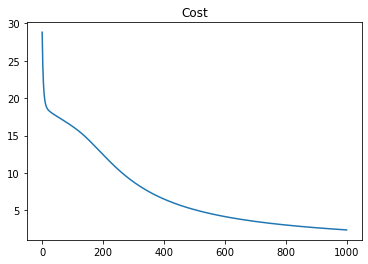

In [11]:
plt.plot(cost)
plt.title('Cost')
plt.show()